In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets('./MNIST_data/', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
tf.reset_default_graph()

In [6]:
#784 input (28 * 28 pixels)

In [7]:
num_inputs = 784
neurons_hidden1 = 392
neurons_hidden2 = 196
neurons_hidden3 = neurons_hidden1
num_outputs = num_inputs

In [8]:
learning_rate = 0.01

In [9]:
actf = tf.nn.relu

In [10]:
X = tf.placeholder(tf.float32, shape=[None, num_inputs])

In [11]:
initalizer = tf.variance_scaling_initializer()

In [12]:
w1 = tf.Variable(initalizer([num_inputs, neurons_hidden1]), dtype=tf.float32)
w2 = tf.Variable(initalizer([neurons_hidden1, neurons_hidden2]), dtype=tf.float32)
w3 = tf.Variable(initalizer([neurons_hidden2, neurons_hidden3]), dtype=tf.float32)
w4 = tf.Variable(initalizer([neurons_hidden3, num_outputs]), dtype=tf.float32)

In [13]:
b1 = tf.Variable(tf.zeros(neurons_hidden1))
b2 = tf.Variable(tf.zeros(neurons_hidden2))
b3 = tf.Variable(tf.zeros(neurons_hidden3))
b4 = tf.Variable(tf.zeros(num_outputs))


In [14]:
act_func = tf.nn.relu

In [15]:
hid_layer1 = act_func(tf.matmul(X,w1)+ b1)
hid_layer2 = act_func(tf.matmul(hid_layer1,w2)+ b2)
hid_layer3 = act_func(tf.matmul(hid_layer2,w3)+ b3)
output_layer = act_func(tf.matmul(hid_layer3,w4)+ b4)

In [16]:
loss = tf.reduce_mean(tf.square(output_layer - X))

In [17]:
optimizer = tf.train.AdamOptimizer(learning_rate)

In [18]:
train  = optimizer.minimize(loss)

In [22]:
init = tf.global_variables_initializer()

In [23]:
saver = tf.train.Saver()

In [25]:
num_epochs = 5
batch_size = 150

with tf.Session() as sess:
    sess.run(init)
    
    # Epoch == Entire Training Set
    for epoch in range(num_epochs):
        
        num_batches = mnist.train.num_examples // batch_size
        
        # 150 batch size
        for iteration in range(num_batches):
            
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(train, feed_dict={X: X_batch})
            
        training_loss = loss.eval(feed_dict={X: X_batch})   
        
        print("Epoch {} Complete. Training Loss: {}".format(epoch,training_loss))
     
    saver.save(sess, "./stacked_autoencoder.ckpt")   

Epoch 0 Complete. Training Loss: 0.025237927213311195
Epoch 1 Complete. Training Loss: 0.025617152452468872
Epoch 2 Complete. Training Loss: 0.02303423546254635
Epoch 3 Complete. Training Loss: 0.022664770483970642
Epoch 4 Complete. Training Loss: 0.01986202783882618


In [26]:
num_test_images = 10

In [29]:
with tf.Session() as sess:
    
    saver.restore(sess, './stacked_autoencoder.ckpt')
    results = output_layer.eval(feed_dict={X:mnist.test.images[:num_test_images]})

INFO:tensorflow:Restoring parameters from ./stacked_autoencoder.ckpt


In [31]:
results

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

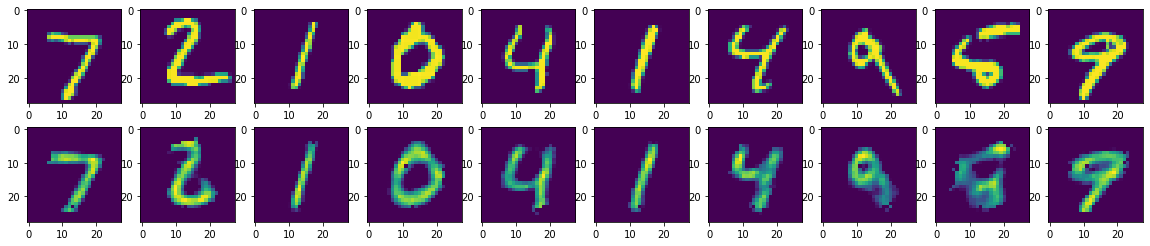

In [32]:
f, a = plt.subplots(2, 10, figsize=(20, 4))
for i in range(num_test_images):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    a[1][i].imshow(np.reshape(results[i], (28, 28)))